# **Breast Cancer Detection using Convolutional Neural Network (CNN)**
    
**Dataset URL:** https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset?select=Breast_cancer_data.csv

**Description of Dataset:**
This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. 
* It contains the 569 breast cancer patients data.
* Training data: 512 (90%)
* Testing data: 57 (10%)

**Tasks:**
* Import Libraries
* Split the Dataset
* Prepare the CNN Model based on Layers
* Train the Model
* Test the Model and Evaluate the Performnce


# **Libraries**

In [2]:
import tensorflow as tf # Facilitates the design and deployment of deep learning models.
from tensorflow.keras import Sequential # Sequential is a class in the TensorFlow Keras that simplifying the process of creating and managing sequential models in DL.
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [3]:
import numpy as np
import pandas as pd # high-performance data structures and data analysis tools for working with structured data, such as data frames.
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library based on Matplotlib, and it provides a high-level interface for creating informative and attractive statistical graphics.
from sklearn import datasets,metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # which is used for standardizing features by removing the mean and scaling to unit variance, a common preprocessing step.

# Dataset

In [5]:
# Dataset Path
## Golobal Variables

dataset_dir = '/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv'
SAVE_MODEL_DIR = '../kaggle/working/best_model.h5'

In [6]:
# Read the dataset file
data = pd.read_csv('/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv', header=0, sep=',', encoding='euc-kr')
# Load the Dataset
cancerData = datasets.load_breast_cancer()

In [14]:
# Features of Dataset
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )
X.head() # displays the first few rows of the DataFrame.
# data.head() 

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [15]:
# It assigned the target values from the cancerData dataset, representing the labels or classes 
y = cancerData.target 

In [16]:
X.shape # Represents the dimensions of the data (sample and features)

(569, 30)

# Splitting the Dataset into Training and Testing

In [345]:
# X_train and y_train represent the training data and labels, while X_test and y_test represent the testing data and labels
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y) 

In [346]:
X_train.shape # Represent the dimensions of the training set

(512, 30)

In [347]:
y_test.shape # eturns the shape of the testing labels y_test. Representing the dimensions of the testing set (number of samples/rows).

(57,)

# Applying StandardScaler

In [348]:
scaler = StandardScaler() # Used to standardize or scale the features of a dataset.

In [349]:
# Uses the transform method to apply the same transformation to the features in the testing set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the dataset to 3-D to pass it through CNN

In [350]:
# Reshape the samples
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

# Preparing the CNN Model

In [351]:
# Batch Normalization is a technique used to normalize the inputs of a neural network layer by adjusting and scaling the activations. 
# Batch Normalization can help improve the training stability and accelerate the training process.
# Dropout layer prevent overfitting.20% of the randomly selected neurons in the preceding layer will be temporarily "dropped out" or set to zero
# Dense layer is often used for feature extraction and introduces non-linear transformations to the data.
# The Flatten layer is used to flatten the input data, transforming it from a multidimensional array (e.g., a 2D array resulting from convolutional layers) into a one-dimensional array.

model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='relu'))

In [352]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_63 (Conv1D)          (None, 29, 16)            48        
                                                                 
 batch_normalization_63 (Ba  (None, 29, 16)            64        
 tchNormalization)                                               
                                                                 
 dropout_96 (Dropout)        (None, 29, 16)            0         
                                                                 
 conv1d_64 (Conv1D)          (None, 28, 32)            1056      
                                                                 
 batch_normalization_64 (Ba  (None, 28, 32)            128       
 tchNormalization)                                               
                                                                 
 dropout_97 (Dropout)        (None, 28, 32)          

# Model Training

In [353]:
# optimizer is responsible for updating the weights of the neural network during training to minimize the loss function.
# Loss function minimize the difference between the predicted probabilities and the true binary labels.
# During training, the accuracy will be monitored as a metric. 

model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [354]:
# Number of epochs defines how many times the entire training dataset is processed by the neural network
# The verbose parameter is set to 1, which means training progress will be displayed during each epoch.
# The validation data (X_test and y_test) is used to evaluate the model's performance on a separate dataset after each epoch. 

history = model.fit(X_train,y_train,epochs= 35, verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
16/16 [==============================] - 2s 22ms/step - loss: 6.3090 - accuracy: 0.4844 - val_loss: 3.1600 - val_accuracy: 0.3684
Epoch 2/35
16/16 [==============================] - 0s 8ms/step - loss: 5.9296 - accuracy: 0.5098 - val_loss: 1.2755 - val_accuracy: 0.3684
Epoch 3/35
16/16 [==============================] - 0s 7ms/step - loss: 5.4550 - accuracy: 0.5488 - val_loss: 0.8666 - val_accuracy: 0.3684
Epoch 4/35
16/16 [==============================] - 0s 8ms/step - loss: 4.8519 - accuracy: 0.5664 - val_loss: 0.6432 - val_accuracy: 0.5965
Epoch 5/35
16/16 [==============================] - 0s 7ms/step - loss: 3.8032 - accuracy: 0.6445 - val_loss: 0.5181 - val_accuracy: 0.8596
Epoch 6/35
16/16 [==============================] - 0s 8ms/step - loss: 4.1175 - accuracy: 0.6445 - val_loss: 0.4537 - val_accuracy: 0.7895
Epoch 7/35
16/16 [==============================] - 0s 8ms/step - loss: 3.7449 - accuracy: 0.6797 - val_loss: 0.4165 - val_accuracy: 0.7544
Epoch 8/35
16/16 [=

# Plots Accuracy and Loss

In [355]:
# function can be used to visualize how the training and validation accuracy.
# as well as the training and validation loss, change over the course of training epochs

def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

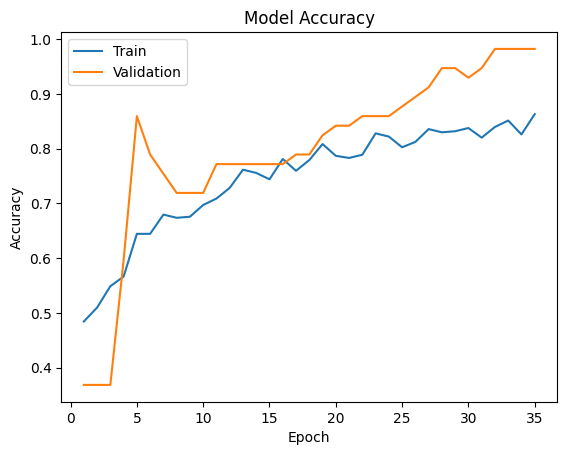

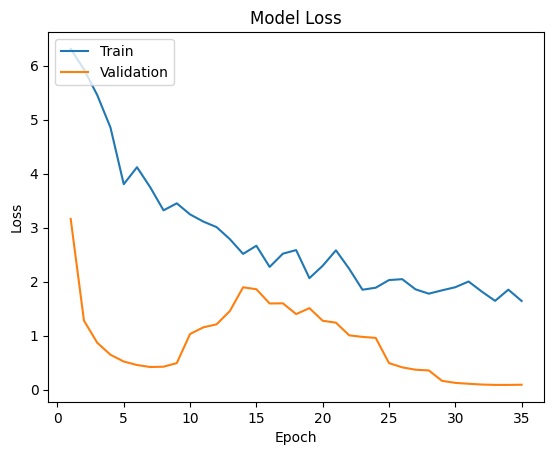

In [356]:
plotLearningCurve(history,35)